# Applications

## Dimensionality Reduction

Dimensionality reduction is a technique that is used to reduce the number of features in a dataset. 

Reducing the number of features of a dataset is desirable for the following reasons:

1. It reduces the time and storage space required and subsequently reduces the computation time.

2. It removes redundant features and the overcome the [curse of dimensionality]().

```{admonition} Curse of dimensionality ☠️
:class: note
The curse of dimensionality refers to the fact that **for each additional feature, the number of training examples required to train the machine learning algorithm grows exponentially**. This is because the volume of the space increases so fast that the available data become sparse. 
```

3. It allows us to visualize high-dimensional data in a 2-dimensional or 3-dimensional space.



In [3]:
import pandas as pd
data = pd.read_csv('https://raw.githubusercontent.com/fahadsultan/datascience_ml/main/data/chat_dataset.csv')

# creating bow representation
vocab = (' '.join(data['message'].values)).lower().split()
bow = pd.DataFrame(columns=vocab)
for word in vocab: 
    bow[word] = data['message'].apply(lambda msg: msg.count(word))

from sklearn.decomposition import PCA
pca = PCA(n_components = 2)

bow_reduced = pca.fit_transform(bow)

In [5]:
data.head()

,message,sentiment
0,I really enjoyed the movie,positive
1,The food was terrible,negative
2,I'm not sure how I feel about this,neutral
3,The service was excellent,positive
4,I had a bad experience,negative


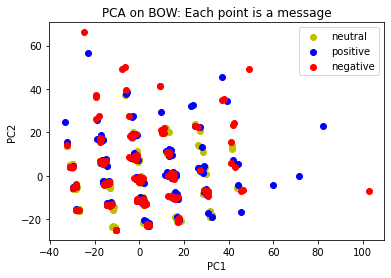

In [22]:
from matplotlib import pyplot as plt 

labels = data['sentiment'].replace({'neutral':0, 'positive':1, 'negative':-1})

pos = bow_reduced[labels==1]
neg = bow_reduced[labels==-1]
neu = bow_reduced[labels==0]

plt.scatter(neu[:,0], neu[:,1], c='y', label='neutral');
plt.scatter(pos[:,0], pos[:,1], c='b', label='positive');
plt.scatter(neg[:,0], neg[:,1], c='r', label='negative');

plt.legend();

plt.title('PCA on BOW: Each point is a message');
plt.xlabel('PC1');
plt.ylabel('PC2');

It is important to point out that **dimensionality reduction is not the same as feature selection**. The main difference is that in dimensionality reduction, we **transform** the data in a lower dimensional space while in feature selection we **select** a subset of the original features. In other words, PC1 and PC2 are linear combinations of the original features, while the features selected in feature selection are the original features.

## K-Nearest Neighbors (KNN)

K-Nearest Neighbors (KNN) is a supervised machine learning algorithm that can be used for both classification and regression problems. KNN is a non-parametric, lazy learning algorithm that classifies a data point based on the $k$ data points that are nearest to it. KNN does not make any assumptions on the underlying data distribution. 

Note that nearest points (observations) can be found by multiplying the matrix representation of observations by its transpose. The resulting matrix contains the distances between all pairs of observations. 

Once you have the similarity matrix, you can find the $k$ nearest neighbors of a particular observation by sorting the row of the similarity matrix corresponding to that observation.

Your prediction can then be mean or median of the target values of the $k$ nearest neighbors.


## Recommender Systems

Recommender systems are a type of information filtering system that are used to predict the rating or preference that a user would give to an item. They are widely used in e-commerce, entertainment, and social media platforms. Recommender systems are of two types:

Nearest Neighbors (KNN) are often used to build recommender systems. Recommender systems are used to recommend items to users based on their past preferences. 

<center><img width="80%" src="https://miro.medium.com/v2/resize:fit:1064/1*aSq9viZGEYiWwL9uJ3Recw.png"></center>

### Collaborative Filtering

Collaborative filtering is a technique that is used to filter out items that a user might like on the basis of reactions by similar users. It works by searching a large group of people and finding a smaller set of users with tastes similar to a particular user. It looks at the items they like and combines them to create a ranked list of suggestions.

Nearest Neighbors (KNN) are used to find the users that are similar to a particular user. The items that are liked by the similar users are then recommended to the particular user.

### Content Based Filtering

Content based filtering is a technique that is used to filter out items that a user might like on the basis of the description of the item itself. It works by creating a profile of the user's interests based on the items that the user has liked in the past. It then recommends items that match the user's profile.

Nearest Neighbors (KNN) are used to find the items that are similar to the items that a user has liked in the past. The similar items are then recommended to the user.

## Social Media Feeds

Social media platforms such as Facebook, Twitter, and Instagram use recommender systems to recommend posts to users. The posts that are recommended to a user are based on the posts that the user has liked in the past.

<center><img width="50%" src="https://miro.medium.com/v2/resize:fit:1400/1*RJwWtfrHtM_mUtJxvkLVOQ.png"></center>

These platforms also use algorithms similar to KNN to sort the posts in a user's feed. The posts that are similar to the posts that a user has liked in the past are shown at the top of the user's feed.